In [2]:
import os
import numpy as np
import pandas as pd
import nitools as nt
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from SUITPy import flatmap
import PcmPy as pcm

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl
import selective_recruitment.scripts.script_prep_sc as ss
import selective_recruitment.scripts.script_wm_sanity_checks as sa

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am
from statsmodels.stats.anova import AnovaRM  # perform F test
from selective_recruitment.scripts.script_roi_differences import norm_within_category,prep_roi_comparison

# import warnings
# warnings.filterwarnings('ignore')


wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Users/jdiedrichsen/Data/wm_cerebellum/selective_recruit'

# Difference between ROIs in the Demand network

## Without anterior-posterior split

In [3]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32_conn_reg.tsv")
D = pd.read_csv(df_path, sep="\t")
D, cond_map = prep_roi_comparison(D)


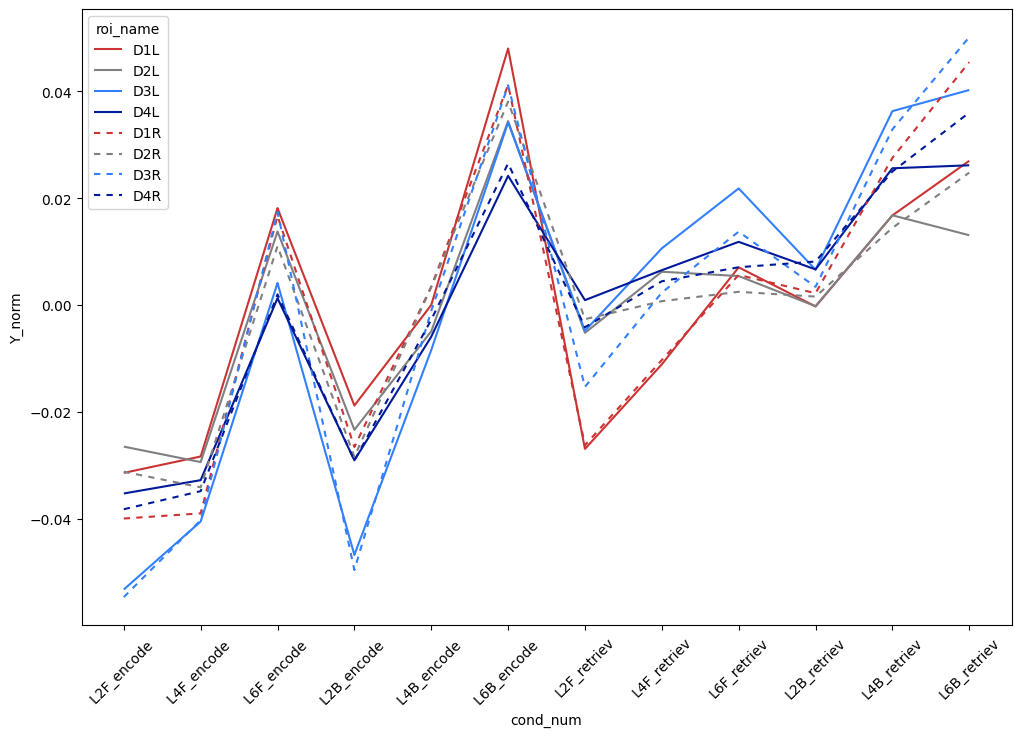

In [4]:
D = norm_within_category(D, category=['roi_name','sn'], value='Y', norm='mean')
plt.figure(figsize=(12,8))
# Define styles and colors
d1 = (1,0)
d2 = (3,3)
red =(0.8,0.2,0.2)
gray = (0.5,0.5,0.5)
lb = (0.2,0.5,1.0)
db = (0.0,0.1,0.6)
pal = [red,gray,lb,db,red,gray,lb,db]
ax = sns.lineplot(data=D, x = 'cond_num', y = 'Y_norm', hue = 'roi_name',style='roi_name',
            palette=pal,
            dashes=[d1,d1,d1,d1,d2,d2,d2,d2],
            err_style=None)
# Find mapping between cond_name and cond_num
ax.set_xticks(np.arange(12)+1)
l=ax.set_xticklabels(cond_map.cond_name.values, rotation=45)


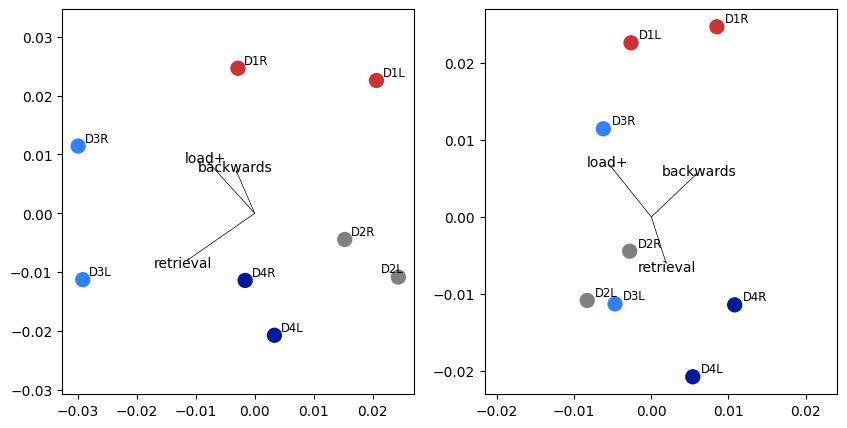

In [5]:

A = pd.pivot_table(data=D,index='roi_name',columns='cond_name',values='Y_norm',aggfunc=np.mean)
C=A.values
C=C/np.sqrt((C**2).sum(axis=1,keepdims=True))
B = C@C.T

K=3
W,V = plotting.calc_mds(A.values,K=K,center=True)
# phase, load, and recall
vs = np.array([[-1, 1,-1, 1,-1,1,-1,1,-1,1,-1,1],
                [-1,-1,-1,-1, 0,0, 0,0, 1,1, 1,1],
                [1,1, -1, -1, 1, 1, -1, -1,1,1, -1, -1]])
vs = vs/np.sqrt((vs**2).sum(axis=1,keepdims=True))
proj_vs = V @ vs.T

pal = [red,red,gray,gray,lb,lb,db,db]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plotting.plot_mds(W[:,0],W[:,1],A.index,
                      colors=pal,
                      vectors=proj_vs[:2,:],
                      v_labels = ['retrieval','load+','backwards'])
plt.subplot(1,2,2)
plotting.plot_mds(W[:,2],W[:,1],A.index,
                      colors=pal,
                      vectors=proj_vs[[2,1],:],
                      v_labels = ['retrieval','load+','backwards'])


## Parcellation divided into anterior and posterior

In [6]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32AP_conn_reg.tsv")
D_ap = pd.read_csv(df_path, sep="\t")
D_ap, cond_map = prep_roi_comparison(D_ap)

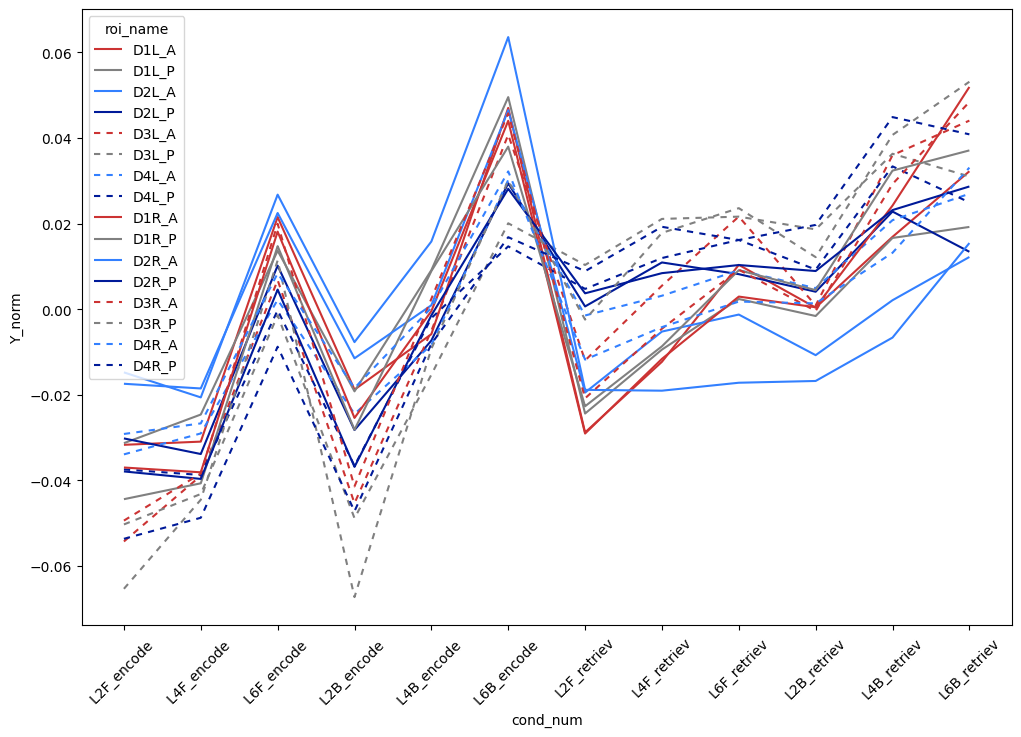

In [30]:
D_ap = norm_within_category(D_ap, category=['roi_name','sn'], value='Y', norm='mean')
plt.figure(figsize=(12,8))
# Define styles and colors
d1 = (1,0)
d2 = (3,3)
red =(0.8,0.2,0.2)
blue = (0.2, 0.5, 0.8)
gray = (0.5,0.5,0.5)
lb = (0.2,0.5,1.0)
db = (0.0,0.1,0.6)
lr = (0.6, 0.1, 0.1)
lg = (0.8,0.8,0.8)
yel = (0.8, 0.8, 0.1)
ry = (0.8, 0.7, 0.1)
pal = [red,gray,lb,db,red,gray,lb,db]
ax = sns.lineplot(data=D_ap, x = 'cond_num', y = 'Y_norm', hue = 'roi_name',style='roi_name',
            palette=pal,
            dashes=[d1,d1,d1,d1,d2,d2,d2,d2],
            err_style=None)
# Find mapping between cond_name and cond_num
ax.set_xticks(np.arange(12)+1)
l=ax.set_xticklabels(cond_map.cond_name.values, rotation=45)

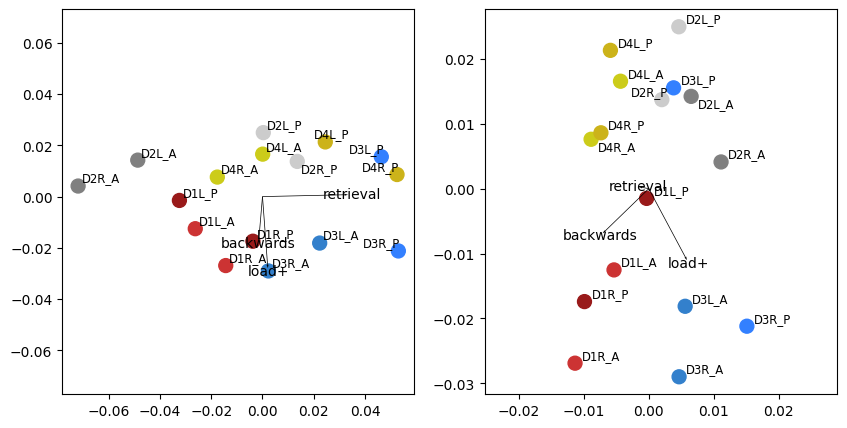

In [31]:

A = pd.pivot_table(data=D_ap,index='roi_name',columns='cond_name',values='Y_norm',aggfunc=np.mean)
C=A.values
C=C/np.sqrt((C**2).sum(axis=1,keepdims=True))
B = C@C.T
# display(A)

K=3
W,V = plotting.calc_mds(A.values,K=K,center=True)
# phase, load, and recall
vs = np.array([[-1, 1,-1, 1,-1,1,-1,1,-1,1,-1,1],
                [-1,-1,-1,-1, 0,0, 0,0, 1,1, 1,1],
                [1,1, -1, -1, 1, 1, -1, -1,1,1, -1, -1]])
vs = vs/np.sqrt((vs**2).sum(axis=1,keepdims=True))
proj_vs = V @ vs.T

pal = [red,lr, red, lr ,gray, lg, gray, lg, blue, lb, blue, lb, yel, ry, yel, ry]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plotting.plot_mds(W[:,0],W[:,1],A.index,
                      colors=pal,
                      vectors=proj_vs[:2,:],
                      v_labels = ['retrieval','load+','backwards'])
plt.subplot(1,2,2)
plotting.plot_mds(W[:,2],W[:,1],A.index,
                      colors=pal,
                      vectors=proj_vs[[2,1],:],
                      v_labels = ['retrieval','load+','backwards'])